In [3]:
from tqdm import tqdm
from sklearn.model_selection import LeaveOneOut
from IPython.utils import io
import pandas as pd
import numpy as np
import networkx as nx
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.preprocessing import StandardScaler
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import InputLayer
from tensorflow.keras.layers import Activation

In [4]:
features = pd.read_csv('gastrointestinal_colonoscopy_lesions_dataset.csv')
features = features.T
class_label = pd.Series(features.index)
features.index = range(features.shape[0])
classes = np.zeros((features.shape[0], 3))
for i in range(classes.shape[0]):
    if 'adenoma' in class_label[i]:
        classes[i,0] = 1.0
        class_label[i] = 0
    elif 'serrated' in class_label[i]:
        classes[i,2] = 1.0
        class_label[i] = 2
    else:
        classes[i,1] = 1.0
        class_label[i] = 1
classes = {'adenoma': classes[:,0], 'hyperplasic': classes[:,1], 'serrated': classes[:,2]}
classes = pd.DataFrame(classes)
class_label = class_label.astype('int')

In [5]:
for col in features.columns:
    if features[col].abs().max()==0:
        continue
    features[col] = (features[col] - features[col].mean())/features[col].abs().max()
features

,0,1,2,3,4,5,6,7,8,9,...,690,691,692,693,694,695,696,697,698,699
0,0.250000,-0.25,0.048325,-0.005553,-0.056058,-0.084224,-0.037834,-0.031987,-0.101462,-0.050684,...,0.397177,0.392793,0.388256,0.383761,0.384351,0.383117,0.379185,0.365162,0.365579,0.375950
1,0.250000,0.25,-0.001203,0.367137,-0.084265,-0.100569,0.018451,0.046227,-0.101911,-0.038210,...,0.397177,0.392793,0.388256,0.383761,0.384351,0.383117,0.379185,0.365162,0.365579,0.375950
2,0.250000,0.25,-0.233810,0.046065,0.024136,0.032700,-0.031101,-0.036372,-0.169688,-0.154002,...,0.060715,0.057743,0.055493,0.056890,0.052044,0.053244,0.052057,0.045743,0.046962,0.047065
3,0.250000,-0.25,-0.182565,0.057049,-0.031463,-0.025114,-0.050518,-0.035422,-0.067798,-0.052955,...,0.060715,0.057743,0.055493,0.056890,0.052044,0.053244,0.052057,0.045743,0.046962,0.047065
4,0.250000,0.25,-0.107936,-0.094438,0.092679,0.038768,0.186656,0.125008,0.095410,0.078630,...,-0.054256,-0.053808,-0.052869,-0.052718,-0.051934,-0.051097,-0.050394,-0.050345,-0.049870,-0.049726
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
147,-0.083333,0.25,0.040649,-0.066683,-0.185786,-0.250955,-0.163660,-0.173238,-0.232896,-0.223542,...,-0.054095,-0.053643,-0.052701,-0.052581,-0.051796,-0.050957,-0.050288,-0.050236,-0.049758,-0.049611
148,-0.083333,0.25,-0.153445,0.092191,-0.010435,-0.057762,-0.097339,-0.111005,-0.120050,0.000883,...,-0.043740,-0.044039,-0.043146,-0.043641,-0.042803,-0.042638,-0.042785,-0.042676,-0.042227,-0.042307
149,-0.083333,-0.25,0.144594,0.231284,-0.043448,-0.041229,-0.173962,-0.202734,-0.153664,-0.000519,...,-0.043740,-0.044039,-0.043146,-0.043641,-0.042803,-0.042638,-0.042785,-0.042676,-0.042227,-0.042307
150,-0.083333,-0.25,-0.169496,-0.098815,-0.207792,-0.250433,-0.221289,-0.226000,0.073333,0.138157,...,-0.053643,-0.053247,-0.052332,-0.052204,-0.051450,-0.050608,-0.049938,-0.049907,-0.049461,-0.049344


Error: Runtime no longer has a reference to this dataframe, please re-run this cell and try again.
Error: Runtime no longer has a reference to this dataframe, please re-run this cell and try again.
Error: Runtime no longer has a reference to this dataframe, please re-run this cell and try again.
Error: Runtime no longer has a reference to this dataframe, please re-run this cell and try again.


In [6]:
model = Sequential([
    
    InputLayer(input_shape=(features.shape[1])),
    
    Dense(7, activation='sigmoid'),
    
    Dense(5, activation='sigmoid'),
    
    Dense(3, activation='sigmoid')
])

model.compile(optimizer='Adam',
              loss='binary_crossentropy',
              metrics=['accuracy']
             )
model.summary()
model.save_weights('model_weights/initial_weights_colonoscopy')

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 7)                 4907      
                                                                 
 dense_1 (Dense)             (None, 5)                 40        
                                                                 
 dense_2 (Dense)             (None, 3)                 18        
                                                                 
Total params: 4,965
Trainable params: 4,965
Non-trainable params: 0
_________________________________________________________________


In [7]:
acc = 0
j = 0
for train_index, test_index in LeaveOneOut().split(features):
    x_train, x_test = features.iloc[train_index,:], features.iloc[test_index,:]
    y_train, y_test = classes.iloc[train_index,:], classes.iloc[test_index,:]
    model.load_weights('model_weights/initial_weights_colonoscopy')
    with io.capture_output() as captured:
        model.fit(x_train, y_train, epochs=500)
    acc += model.evaluate(x_test, y_test)[1]
    j+=1

1/1 [==============================] - 0s 20ms/step - loss: 0.5994 - accuracy: 0.0000e+00


In [8]:
print('Accuracy: ', acc/j)

Accuracy:  0.868421052631579


In [9]:
model.fit(features, classes, epochs=500)

Epoch 1/500
5/5 [==============================] - 0s 3ms/step - loss: 0.0856 - accuracy: 0.9934
Epoch 2/500
5/5 [==============================] - 0s 3ms/step - loss: 0.0851 - accuracy: 0.9934
Epoch 3/500
5/5 [==============================] - 0s 3ms/step - loss: 0.0846 - accuracy: 0.9934
Epoch 4/500
5/5 [==============================] - 0s 3ms/step - loss: 0.0842 - accuracy: 0.9934
Epoch 5/500
5/5 [==============================] - 0s 3ms/step - loss: 0.0836 - accuracy: 0.9934
Epoch 6/500
5/5 [==============================] - 0s 4ms/step - loss: 0.0833 - accuracy: 1.0000
Epoch 7/500
5/5 [==============================] - 0s 4ms/step - loss: 0.0829 - accuracy: 1.0000
Epoch 8/500
5/5 [==============================] - 0s 3ms/step - loss: 0.0825 - accuracy: 1.0000
Epoch 9/500
5/5 [==============================] - 0s 4ms/step - loss: 0.0821 - accuracy: 1.0000
Epoch 10/500
5/5 [==============================] - 0s 3ms/step - loss: 0.0817 - accuracy: 1.0000
Epoch 11/500
5/5 [===========

In [10]:
grad_sum = 0
for col_name in tqdm(features.columns):
    pointFrame = features.loc[:, features.columns != col_name]
    for i in features[col_name]:
        pointFrame[col_name] = i*np.ones(len(features.index))
        points = tf.Variable(pointFrame, dtype='float')
        with tf.GradientTape() as tape:
            pred = model(points, training=False)
        grads = tape.gradient(pred, points)
        grad_sum += np.abs(grads.numpy())
saliency_order = np.argsort(-np.sum(np.abs(grad_sum), 0))

100%|██████████| 700/700 [08:35<00:00,  1.36it/s]


In [11]:
print('The features arranged in order of saliency are: \n')
features[saliency_order]

The features arranged in order of saliency are: 



,0,547,555,146,464,546,545,455,549,581,...,291,391,182,325,261,404,394,274,322,366
0,0.250000,0.019453,0.006736,0.014037,0.156682,0.017661,0.020956,-0.008144,0.013944,-0.000948,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.250000,0.019453,0.006736,0.009191,-0.071990,0.017661,0.020956,-0.008144,0.013944,-0.000948,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.250000,0.012418,0.010090,0.008758,-0.131291,-0.007271,0.007180,0.229704,0.016346,0.004249,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.250000,0.012418,0.010090,0.066090,-0.140440,-0.007271,0.007180,-0.008144,0.016346,0.004249,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.250000,0.018683,-0.003327,-0.104275,-0.029781,0.021297,0.012956,-0.008144,0.017094,0.005566,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
147,-0.083333,0.006751,0.009065,-0.029268,0.063551,0.006035,0.018410,-0.008144,-0.003144,-0.002889,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
148,-0.083333,0.009858,0.007854,-0.007182,-0.040653,0.009186,0.009247,-0.008144,0.007949,0.001962,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
149,-0.083333,0.009858,0.007854,0.030283,-0.026035,0.009186,0.009247,-0.008144,0.007949,0.001962,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
150,-0.083333,-0.044736,-0.010036,-0.007820,-0.140440,-0.050214,-0.043478,-0.008144,-0.039516,0.010348,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


[]

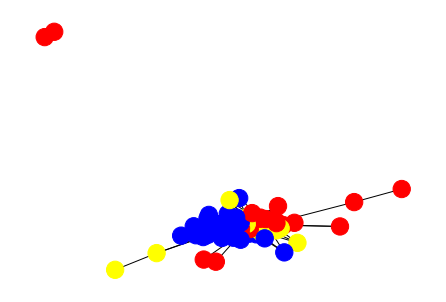

In [12]:
num_features = 100
salient_features = features.iloc[:,saliency_order[0:num_features]]
A = np.zeros((features.shape[0], features.shape[0]))
for i in features.index:
    for j in range(i):
        A[i,j] = np.linalg.norm(salient_features.iloc[i,:] - salient_features.iloc[j,:])
A = A + np.transpose(A)
p = 1.3
A = (A < p)
A = A - np.eye(A.shape[0])
rows, cols = np.where(A==1)
edges = zip(rows.tolist(), cols.tolist())
G = nx.Graph()
G.add_edges_from(edges, node_size=1)
color_map = np.array([])
for node in G:
    if (class_label[node]==0):
        color_map = np.append(color_map, 'red')
    elif (class_label[node]==1):
        color_map = np.append(color_map, 'blue')
    else:
        color_map = np.append(color_map, 'yellow')
nx.draw(G, node_color=color_map)
plt.plot()

In [13]:
nx.is_connected(G) # tells whether or not the graph is connected
nx.number_connected_components(G) # number of different connected components
nx.density(G) # this tells how close the graph is to being fully connected
# nx.clustering(G) # gives the clustering value of each vertex
nx.average_clustering(G) # clustering value for the whole graph
nx.transitivity(G) # 3* number of triangles in G/ number of connected triads in G

0.7817564178204491

[]

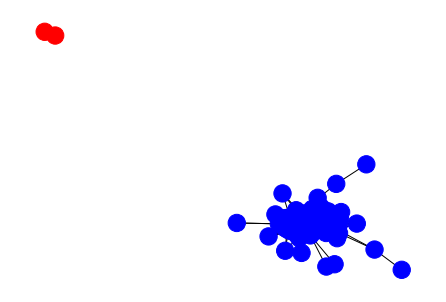

In [14]:
giant_component = G.subgraph(max(nx.connected_components(G), key=len))
color_map_GC = np.array([])
for node in G:
    if node in giant_component:
        color_map_GC = np.append(color_map_GC, 'blue')
    else:
        color_map_GC = np.append(color_map_GC, 'red')
nx.draw(G, node_color=color_map_GC)
plt.plot()

In [15]:
print(f'Eccentricity of giant component: {nx.eccentricity(giant_component)}') # largest possible shortest path distance between a vertex and all other vertices
print(f'Diameter of giant component: {nx.diameter(giant_component)}') # maximum shortest distance between a pair of vertices in G, it is the largest possible eccentricity value of a vertex
print(f'Radius of giant component: {nx.radius(giant_component)}') #  minimum eccentricity value of a vertex

print(f'Degree centrality: \n{nx.degree_centrality(G)}') # number of edges incident upon a vertex
print(f'Maximum degree centrality: {max(nx.degree_centrality(G))}')
print(f'Degree histogram: {nx.degree_histogram(G)}')

# below gives us the different centrality measures for the vertices of the graphs
print(f'Eigenvector centrality: \n{nx.eigenvector_centrality(G)}')
print(f'Maximum eigenvector centrality: {max(nx.eigenvector_centrality(G))}')
print(f'Closeness centrality: \n{nx.closeness_centrality(G)}')
print(f'Maximum closeness centrality: {max(nx.closeness_centrality(G))}')
print(f'Betweeness centrality: \n{nx.betweenness_centrality(G)}')
print(f'Maximum betweeness centrality: {max(nx.betweenness_centrality(G))}')

Eccentricity of giant component: {0: 4, 1: 4, 2: 4, 4: 4, 5: 4, 6: 4, 7: 4, 8: 4, 9: 4, 10: 4, 11: 4, 12: 4, 13: 4, 14: 4, 15: 4, 16: 4, 17: 4, 18: 4, 20: 4, 21: 4, 22: 4, 23: 4, 24: 4, 25: 4, 26: 4, 27: 4, 28: 4, 29: 4, 30: 4, 31: 4, 32: 4, 33: 4, 34: 4, 35: 4, 36: 4, 37: 4, 38: 4, 39: 4, 43: 4, 46: 4, 47: 4, 50: 4, 51: 4, 53: 4, 54: 4, 55: 4, 56: 4, 57: 4, 58: 4, 59: 4, 60: 5, 61: 4, 62: 4, 63: 4, 64: 4, 65: 4, 66: 4, 67: 4, 72: 4, 76: 4, 77: 4, 78: 4, 81: 4, 89: 4, 92: 4, 102: 4, 116: 4, 122: 4, 123: 4, 124: 4, 125: 3, 126: 4, 127: 4, 128: 3, 132: 4, 136: 3, 137: 4, 138: 4, 139: 4, 140: 4, 141: 4, 142: 4, 143: 4, 144: 4, 145: 4, 146: 4, 147: 4, 148: 4, 149: 4, 151: 4, 75: 4, 129: 4, 3: 4, 41: 4, 42: 4, 52: 4, 90: 4, 96: 4, 97: 4, 113: 4, 150: 4, 40: 5, 74: 4, 69: 4, 133: 4, 68: 4, 87: 4, 99: 4, 100: 4, 73: 4, 101: 4, 19: 5, 88: 4, 115: 4, 80: 4, 91: 4, 95: 4, 121: 4, 82: 4, 83: 4, 108: 4, 109: 4, 118: 4, 131: 5, 49: 5, 86: 5, 48: 6, 105: 4, 98: 4, 120: 4, 70: 5, 71: 5, 119: 4, 130: 

In [22]:
kmeans = KMeans(n_clusters=3)
kmeans.fit(salient_features)
print('***KMEANS for 3 clusters***')
print('Number of Iterations: ', kmeans.n_iter_)
print('Cluster Centers: ', kmeans.cluster_centers_)
print('Inertia: ', kmeans.inertia_) # SSE
predicted_label = kmeans.labels_

***KMEANS for 3 clusters***
Number of Iterations:  7
Cluster Centers:  [[ 1.38888889e-01 -2.00401437e-02 -1.72608889e-02 -5.03328904e-03
   1.82368400e-02 -1.89933817e-02 -1.89708224e-02 -8.14373591e-03
  -1.95993787e-02  1.60832899e-02 -1.62825961e-01  4.21324344e-03
  -3.15710220e-02 -1.61973382e-03 -2.35679472e-02 -2.59257662e-03
   7.88215285e-03 -2.51576706e-02  1.27651587e-02 -4.35455305e-03
   8.46946364e-02 -3.83832946e-02 -1.34866726e-02 -2.12096910e-02
   5.96966873e-02  1.15021269e-01 -4.02382102e-02  3.67013488e-02
  -1.69982631e-02  2.33057241e-02  1.01653679e-01 -1.75302355e-02
   6.36539239e-02  9.00936049e-02  2.65141030e-03 -1.38758305e-02
  -6.91362454e-03 -9.26836411e-02 -2.07387588e-02 -3.26810531e-02
  -7.26592878e-02 -1.74832040e-01 -2.14162078e-01 -1.57683639e-01
  -2.74505264e-02  7.35844657e-03 -2.13465867e-02 -1.35039620e-01
  -2.56053950e-02  3.65670993e-03 -1.51412096e-01  1.31433527e-01
   2.86271820e-02 -1.67245359e-03 -2.25154316e-02  2.37684017e-02
  -6.

In [27]:
compared_classes = np.array([])
for i in classes.iterrows():
    if i[1]['adenoma']==1:
        compared_classes = np.append(compared_classes, 2)
    elif i[1]['hyperplasic']==1:
        compared_classes = np.append(compared_classes, 1)
    else:
        compared_classes = np.append(compared_classes, 0)
print('KMeans accuracy for 3 classes: ', np.count_nonzero(compared_classes==predicted_label)/len(predicted_label))

KMeans accuracy for 3 classes:  0.7697368421052632


In [18]:
kmeans = KMeans(n_clusters=2)
kmeans.fit(salient_features)
print('***KMEANS for 2 clusters***')
print('Number of Iterations: ', kmeans.n_iter_)
print('Cluster Centers: ', kmeans.cluster_centers_)
print('Inertia: ', kmeans.inertia_) # SSE
predicted_label = kmeans.labels_

***KMEANS for 2 clusters***
Number of Iterations:  6
Cluster Centers:  [[ 1.71146953e-01  8.31561889e-03  5.07989477e-03 -6.50461932e-03
  -3.07950831e-02  7.46112803e-03  7.84496021e-03  5.16645612e-03
   6.97391247e-03 -1.50729272e-03  1.96626853e-02  2.45732251e-03
   1.54154304e-02  2.60164351e-03  7.21372855e-03  1.51746395e-02
  -1.18132244e-03  6.50043810e-03 -1.31329659e-03  9.08122931e-03
  -8.81942600e-03  1.08002731e-02  1.47121275e-02  7.59645047e-03
  -2.41408323e-02  4.96117100e-03  4.16400575e-02  1.47456863e-02
   7.71250137e-03  3.03747461e-02  1.47182692e-02  6.19741571e-03
  -5.43718222e-02 -5.30362443e-02  2.37835161e-03  4.24471363e-03
   1.07808560e-02  2.33027633e-02  8.07875188e-03  1.26322325e-03
   6.63375032e-02  1.62359862e-02  5.46211405e-02  1.70047404e-02
  -1.72746753e-02 -5.03438819e-02  6.67727034e-03  6.35103656e-02
  -1.75696006e-02 -1.39792976e-02  1.76823956e-02 -4.66745074e-02
  -1.00817523e-02 -3.87035500e-02  7.20187029e-03  1.27684277e-02
   1.

In [21]:
compared_classes = np.array([])
for i in classes.iterrows():
    if i[1]['adenoma']==1:
        compared_classes = np.append(compared_classes, 0)
    elif i[1]['hyperplasic']==1:
        compared_classes = np.append(compared_classes, 1)
    else:
        compared_classes = np.append(compared_classes, 0)
print('KMeans accuracy for 2 classes: ', np.count_nonzero(compared_classes==predicted_label)/len(predicted_label))

KMeans accuracy for 2 classes:  0.8881578947368421


[]

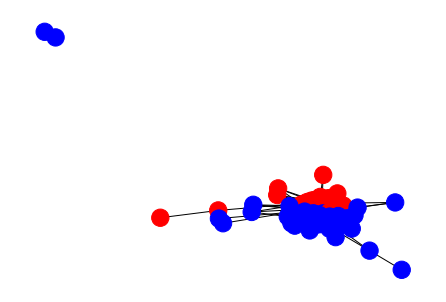

In [20]:
color_map_cluster = np.array([])
for node in G:
    if (predicted_label[node]==0):
        color_map_cluster = np.append(color_map_cluster, 'red')
    elif (predicted_label[node]==1):
        color_map_cluster = np.append(color_map_cluster, 'blue')
    else:
        color_map_cluster = np.append(color_map_cluster, 'yellow')
nx.draw(G, node_color=color_map_cluster)
plt.plot()